# Gender Classfication using CNN

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
import scipy
import scipy.io as sio
import numpy as np
from PIL import Image
import math
import os
from keras.models import Sequential
from keras.layers import *
from keras.layers.advanced_activations import PReLU
#utilities help us transform our data
from keras.utils import * 
#from sklearn.cross_validation import train_test_split
#rows, cols = 64,64
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
import tensorflow as tf

import cv2
from keras.models import load_model
from statistics import mode
#from utils import preprocess_input
from random import shuffle



Using TensorFlow backend.


In [2]:
img_width, img_height = 150, 150

train_data_dir = 'images/train'
validation_data_dir = 'images/validation'


##preprocessing
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
type(datagen)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')


Found 3692 images belonging to 2 classes.
Found 898 images belonging to 2 classes.


## CNN

In [3]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [6]:
epochs = 20
train_samples = 3692
validation_samples = 898

model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
115/115 [==============================] - 103s 900ms/step - loss: 0.5229 - acc: 0.7291 - val_loss: 0.5066 - val_acc: 0.8013
Epoch 2/20
115/115 [==============================] - 101s 879ms/step - loss: 0.4157 - acc: 0.8006 - val_loss: 0.4817 - val_acc: 0.8072
Epoch 3/20
115/115 [==============================] - 89s 770ms/step - loss: 0.3683 - acc: 0.8265 - val_loss: 0.4611 - val_acc: 0.8199
Epoch 4/20
115/115 [==============================] - 82s 714ms/step - loss: 0.3272 - acc: 0.8562 - val_loss: 0.4835 - val_acc: 0.8210
Epoch 5/20
115/115 [==============================] - 82s 712ms/step - loss: 0.3080 - acc: 0.8740 - val_loss: 0.4430 - val_acc: 0.8048
Epoch 6/20
115/115 [==============================] - 82s 710ms/step - loss: 0.2807 - acc: 0.8813 - val_loss: 0.4714 - val_acc: 0.7968
Epoch 7/20
115/115 [==============================] - 76s 658ms/step - loss: 0.2420 - acc: 0.8971 - val_loss: 0.4430 - val_acc: 0.8349
Epoch

In [7]:
model.save('CNN_2')

In [8]:
import tensorflow as tf
model = tf.keras.models.load_model("CNN_2")

In [9]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
from matplotlib import pyplot as plt

test_image = image.load_img('images/test/Scarlett-Johansson.jpg', target_size=(150, 150))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result= model.predict(test_image)

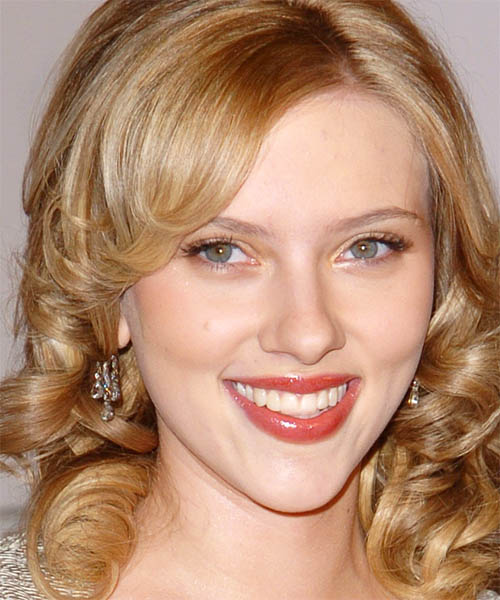

In [10]:
from IPython.display import Image
Image(filename='images/test/Scarlett-Johansson.jpg', width=420) 

In [11]:
print(int(result[0][0]))

0


In [12]:
np.argmax(result[0])

0

In [13]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [14]:
train_generator.class_indices
if result[0][0] == 0: 
    prediction = 'Female'
elif result[0][0] == 1:
    prediction ='Male'

In [15]:
prediction

'Female'

In [16]:
test_image_M = image.load_img('images/test/Chris_Evans.jpg', target_size=(150, 150))

test_image_M = image.img_to_array(test_image_M)
test_image_M = np.expand_dims(test_image_M, axis = 0)
result_M= model.predict(test_image_M)

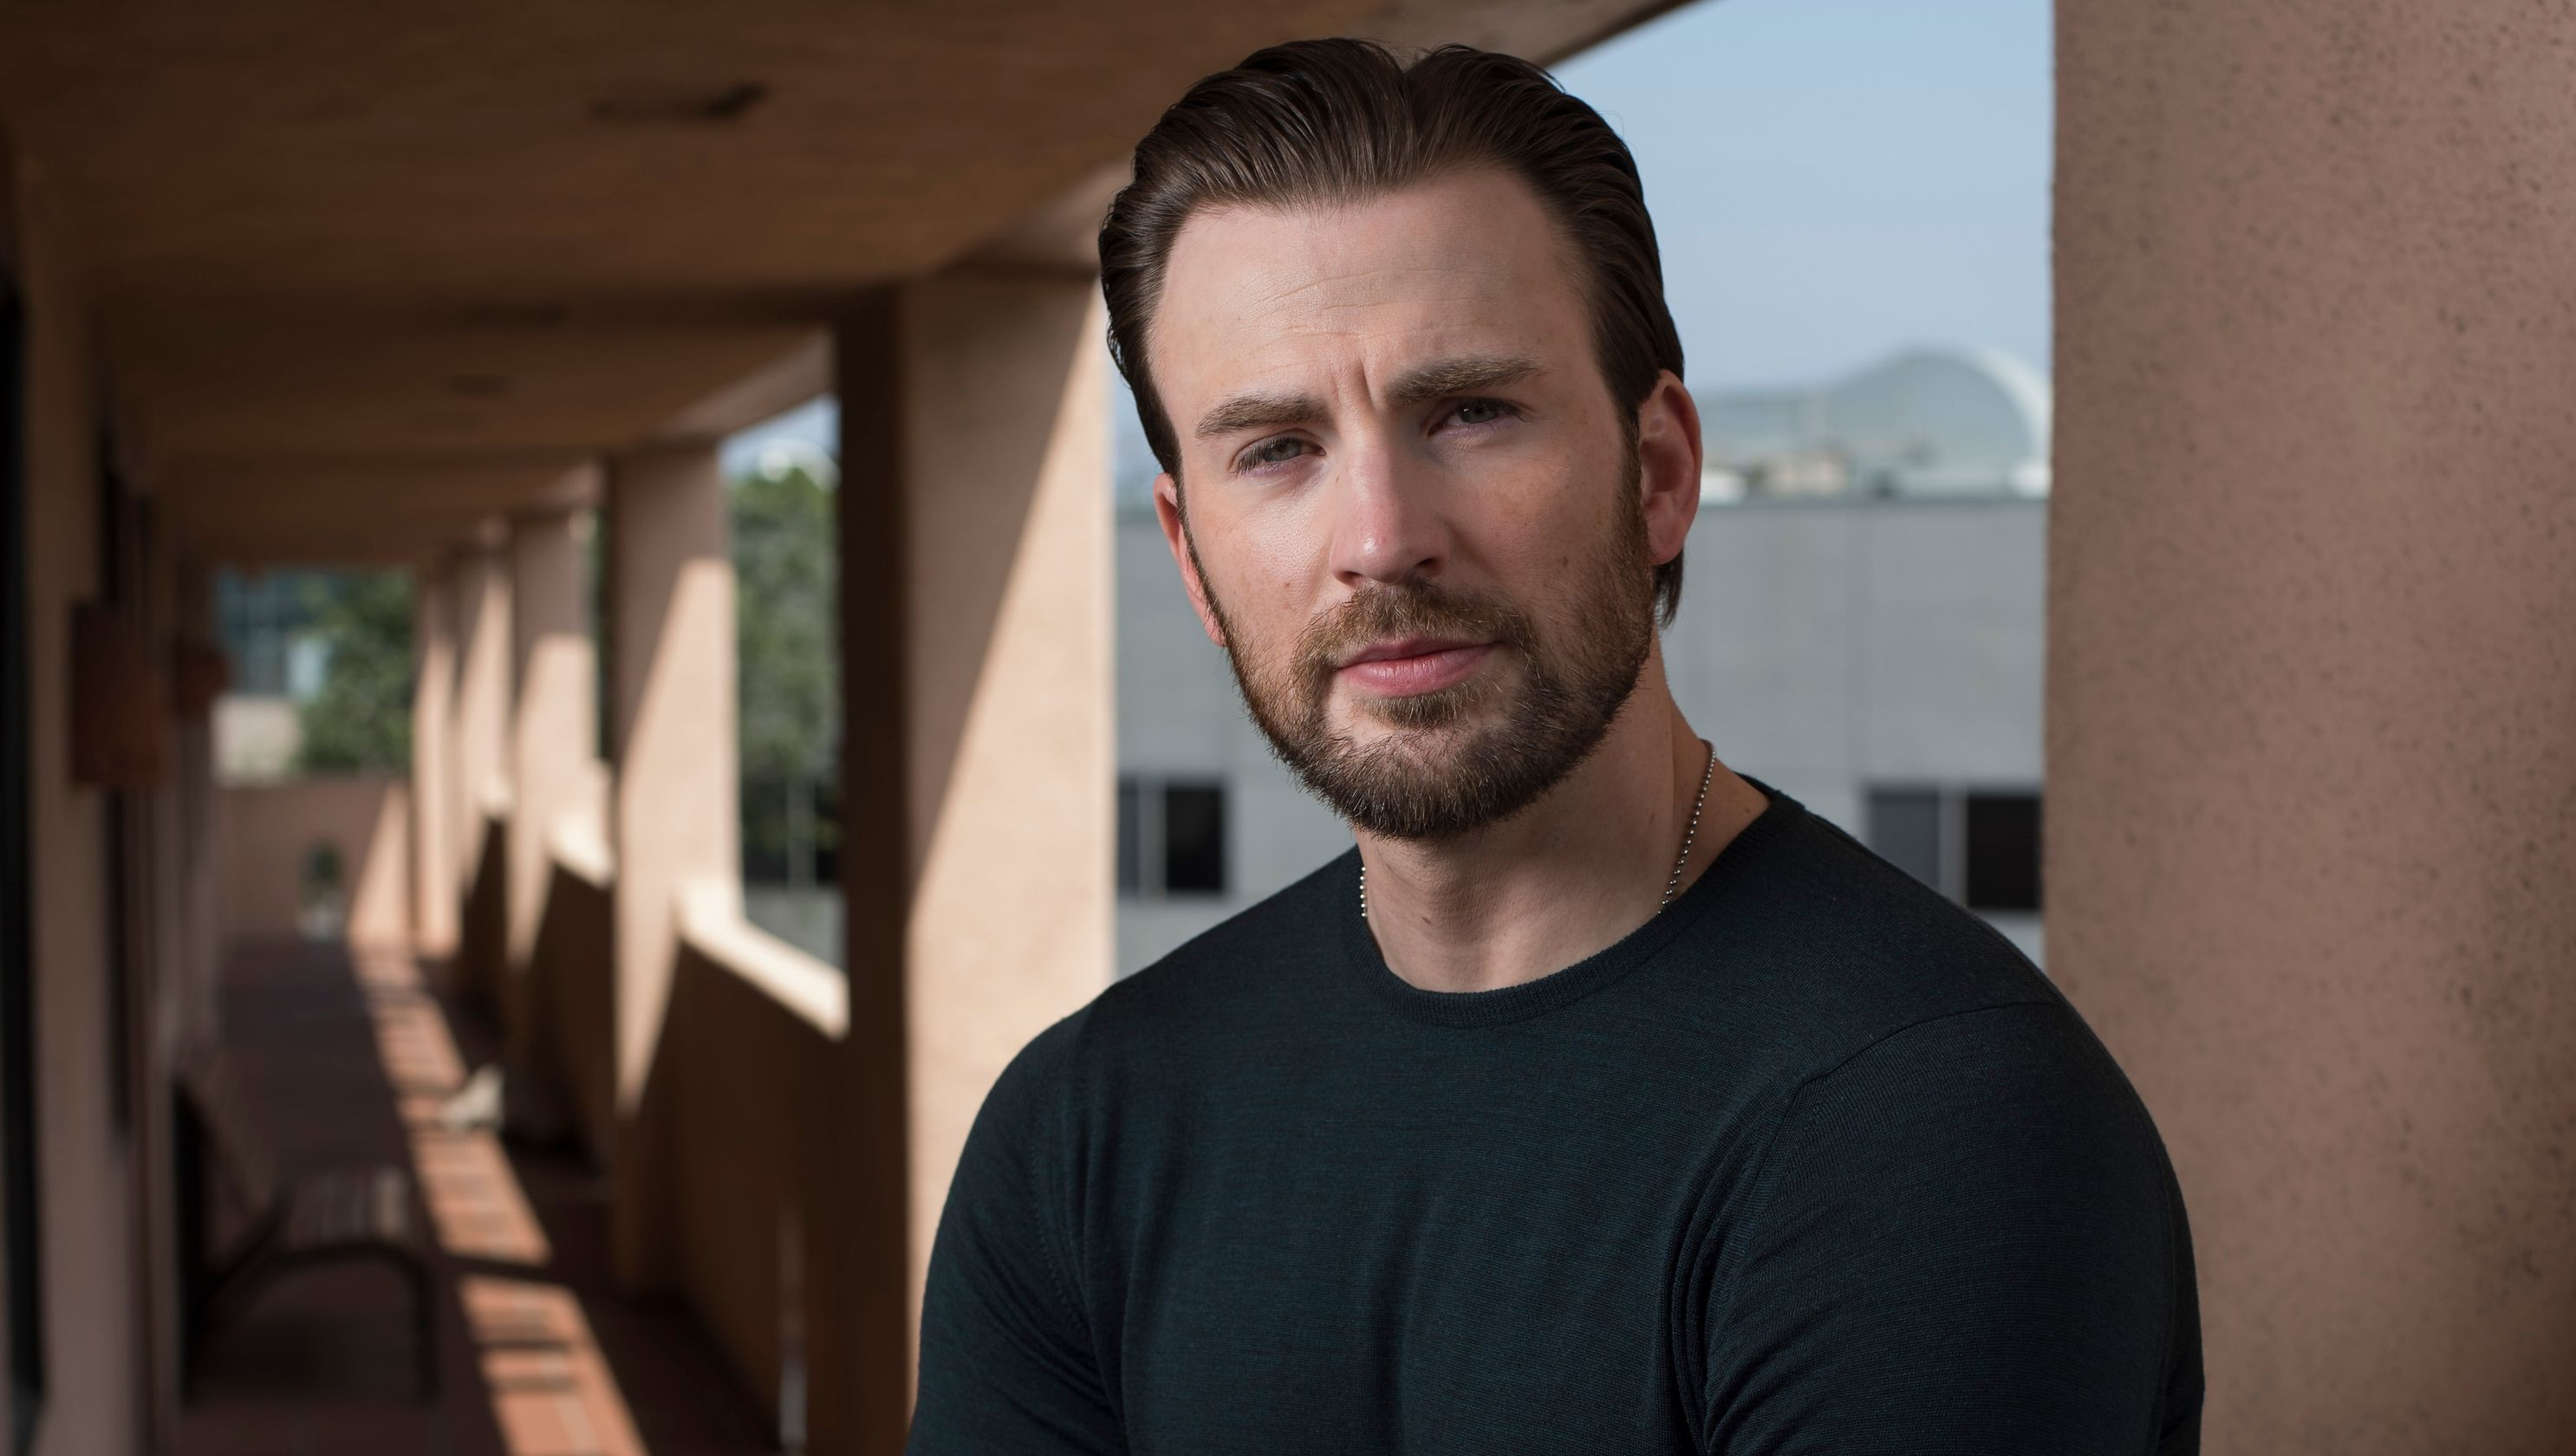

In [17]:
from IPython.display import Image
Image(filename='images/test/Chris_Evans.jpg', width=420) 

In [18]:
train_generator.class_indices
if result_M[0][0] == 0: 
    prediction_1 = 'Female'
elif result_M[0][0] == 1:
    prediction_1 ='Male'

In [19]:
prediction_1

'Male'